# ROC

* 수신자 판단 곡선 (receiver operation characteristic)
* 세계 2차대전 통신장비 성능평가를 위해 고안된 수치
    + 레이더 데이터를 분석해서 적 항공기와 신호소음을 구분
    + 수신기의 감도가 증가함에 따라 거짓긍정(특이성)의 수가 감소
* 의학분야에 많이 사용되지만 머신러닝의 이진분류 모델 성능 평가에도 사용
* ROC 곡선의 y축은 민감도, x축은 1-재현율로 그림
* 모델이 양성/긍정으로 예측했을때 얼마나 잘 맞추고 있는지 설명

In [3]:
# 타이타닉 데이터셋을 로지스틱 회귀로 분석한 후  특이도/재현율을 구한다음 ROC 그래프를 그려보세요

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [6]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,life,seat,port
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,live,1st,cherbourg
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,live,1st,cherbourg
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,dead,1st,cherbourg
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,dead,1st,cherbourg
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,dead,1st,cherbourg


In [8]:
titanic['gender'] = titanic['sex'].apply(lambda x : 0 if x == 'female' else 1)

In [10]:
titanic['harbor'] = titanic['embarked'].apply(lambda x:0 if x == 'C' else (1 if x =='S' else 2))

In [11]:
data = titanic.iloc[:, [0,4,5,6,8,13,14]]
target = titanic.survived

In [12]:
titanic.to_csv('titanic3.csv', index=False)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, train_size=0.7, random_state=2111050955)

In [15]:
lrclf = LogisticRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## 분류 알고리즘 종류
* 판별함수 모형
  + 주어진 데이터를 범주에 따라 서로 다른 영역으로 나누는 경계면을 찾아낸 후    
     이 경계면을 기준으로 데이터가 어디에 속하는지 계산하는 함수 사용
     
     </br>
     </br>
* 확률절 판별/생성 모형
  + 주어진 데이터에 대해 각 범주/레이블이 정답일 조건부확률을 계산하는 방법에 따라     
    조건부확률 함수를 추정하거나 베이즈 정리를 사용해서 분류하는 모형
     </br>
     </br>
* 분류기의 예측 불확실성을 추정하려면 scikit-learn에서 제공하는 2가지 함수 사용
  + predict / predict_proba

In [17]:
# 타이타닉 생존 예측확률 알아보기 1
Xtest[:5]
lrclf.predict(Xtest[:5])   # 예측결과는 이산형값으로 출력

array([0, 0, 0, 0, 0])

In [18]:
# 타이타닉 생존 예측확률 알아보기 2
lrclf.predict_proba(Xtest[:5])   # 예측결과는 확률수치로 출력

array([[0.75907372, 0.24092628],
       [0.53317206, 0.46682794],
       [0.90039215, 0.09960785],
       [0.90023582, 0.09976418],
       [0.95356543, 0.04643457]])

In [21]:
# 확률적 판별/생성 모형을 통해 특이도에 따른 재현율의 변화를 살펴봄
lrclf.predict_proba(Xtest)[:5]

array([[0.75907372, 0.24092628],
       [0.53317206, 0.46682794],
       [0.90039215, 0.09960785],
       [0.90023582, 0.09976418],
       [0.95356543, 0.04643457]])

In [23]:
pred_proba = lrclf.predict_proba(Xtest)[:,1]
pred_proba.shape   # 예측확률 건수 => 392

(392,)

In [25]:
# 실제값, 확률값, 예측값을 하나의 데이터프레임에 작성
df = pd.DataFrame()
df['ytest'] = ytest
df['proba'] = pred_proba   # FP 확률   
df['proba'] = pred
df.head()

,ytest,proba
332,0,0
164,1,0
1289,0,0
1279,0,0
1001,1,0


In [42]:
# 각 예측확률별 특이도 FPR와 민감도 TPR, 임계값을 구함
# 즉, 생존했는데 사망했다고 예측한 비율과
from sklearn.metrics import roc_curve

In [28]:
fprs, tprs, thresholds = roc_curve(ytest, pred_proba)
print('음성판단', fprs[:10])
print('양성판단', tprs[:10])

음성판단 [0.         0.00396825 0.00396825 0.00396825 0.00396825 0.00793651
 0.00793651 0.01587302 0.01587302 0.01587302]
양성판단 [0.         0.         0.24285714 0.25714286 0.27857143 0.28571429
 0.33571429 0.33571429 0.35714286 0.36428571]


In [31]:
roc = pd.DataFrame({'FPR':fprs, 'TPR':tprs, 'Threshold':thresholds})

<img src='img/thredhold2low.gif'>
<img src='img/thredhold2high.gif'>
<img src='img/thredhold2curve.gif'>
<img src='img/roc2good.gif'>

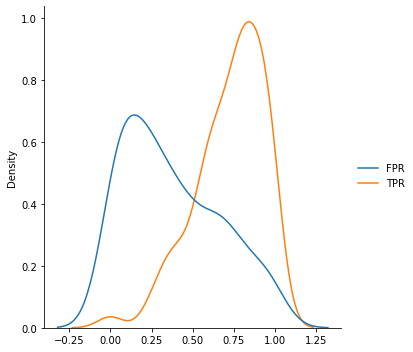

In [33]:
# fpr과 tpr의 수치 시각화
# TPR 곡선과 FPR 곡선이 서로 겹칠수록 분류기의 성능은 떨어짐

sns.displot(roc.iloc[:, [0,1]], kind='kde')

In [34]:
# 최적의 임계값살펴보기
# tprs와 fprs 중 가장 큰 값을 찾아서 서로 빼줌
optidx = np.argmax(tprs-fprs)
optths = thresholds[optidx]
optths 

0.5200862449201471

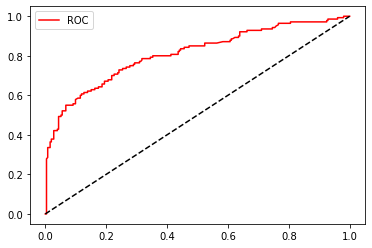

In [40]:
# ROC 그래프 그림
# 커브가 왼쪽 최상단에 가깝게 붙을수록 좋은 분류기임
# x축은 FPR, y축은 TPR을 의미
# TP : 사망한 승객을 사망했다고 예측한 것
# FP : 사망하지 않은 승객을 사망했다고 예측한 것
plt.plot(fprs, tprs, 'r', label='ROC',)
plt.plot([0,1], [0,1], 'k--')
plt.legend()

## AUC
* 0.7 ~ 0.8 : normal
* 0.8 ~ 0.9 : good
* 0.9 ~ 1 : excellent

In [36]:
from sklearn.metrics import roc_auc_score

In [37]:
roc_auc_score(ytest, pred)

0.7416666666666667